In [1]:
import os
import warnings
import re

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from wordcloud import WordCloud

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", None)

In [3]:
# Reading data
df = pd.read_csv("../input/zomato-bangalore-restaurants/zomato.csv", encoding='utf-8')

In [4]:
# Exploring data
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
# Exploring features
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
# Exploring dimensions
print("dataset contains {} rows and {} columns".format(df.shape[0],df.shape[1]))

dataset contains 51717 rows and 17 columns


In [7]:
# Exploring information summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
# Statistical summery
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


### Features definition:

* **url**: contains the url of the restaurant in the zomato website.
* **address:** contains the address of the restaurant in Bengaluru.
* **name:** contains the name of the restaurant.
* **online-order:** whether online ordering is available in the restaurant or not.
* **book-table:** table book option available or not.
* **rate:** contains the overall rating of the restaurant out of 5.
* **votes:** contains total number of rating for the restaurant as of the above mentioned date.
* **phone:** contains the phone number of the restaurant.
* **location:** contains the neighborhood in which the restaurant is located.
* **rest-type:** restaurant type.
* **dish_liked:** dishes people liked in the restaurant
* **cuisines:** food styles, separated by comma
* **approx_cost(for two people):** contains the approximate cost for meal for two people
* **reviews_list:** of tuples containing reviews for the restaurant, each tuple
* **menu_item:** contains list of menus available in the restaurant
* **listed_in(type):** type of meal
* **listed_in(city):** contains the neighborhood in which the restaurant is listed


In [9]:
df.rename(columns={
    'approx_cost(for two people)': 'average_cost',
    'listed_in(city)': 'neighborhood',
    'listed_in(type)': 'meal_type'},
          inplace=True)

In [10]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'average_cost', 'reviews_list', 'menu_item', 'meal_type',
       'neighborhood'],
      dtype='object')

## Data Preprocessing:

In [11]:
# check for nulls
df.isnull().sum()

url                 0
address             0
name                0
online_order        0
book_table          0
rate             7775
votes               0
phone            1208
location           21
rest_type         227
dish_liked      28078
cuisines           45
average_cost      346
reviews_list        0
menu_item           0
meal_type           0
neighborhood        0
dtype: int64

In [12]:
# Nulls percentage
print("Percentage NaN values in df:")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage NaN values in df:


url              0.00
address          0.00
name             0.00
online_order     0.00
book_table       0.00
rate            15.03
votes            0.00
phone            2.34
location         0.04
rest_type        0.44
dish_liked      54.29
cuisines         0.09
average_cost     0.67
reviews_list     0.00
menu_item        0.00
meal_type        0.00
neighborhood     0.00
dtype: float64

drop missing values lessthan 1%:

In [13]:
df.dropna(subset = ['location','cuisines', 'rest_type', 'average_cost'],inplace = True)

In [14]:
df[df.menu_item == '[]'].shape[0]

39093

the menu_item contain too much empty data

In [15]:
df.drop('menu_item', axis = 1, inplace = True)

In [16]:
# check for nulls
df.isnull().sum()

url                 0
address             0
name                0
online_order        0
book_table          0
rate             7615
votes               0
phone             869
location            0
rest_type           0
dish_liked      27713
cuisines            0
average_cost        0
reviews_list        0
meal_type           0
neighborhood        0
dtype: int64

**rate** , **phone** , **dish_liked** will be handled late in the notebook.

In [17]:
#Check for Duplicates
df.duplicated().sum()

0

- Although there is no dublicated data but there aren't 51k restaurants in Bengaluru. 
- **Then, How 51K (51k different link for each restaurant) restaurants were listed in the zomato website?**

- **The Answer is:** the data set was scraped individually for each category. Ex.: Buffet, dineout, pubs, bars, delivery, nightlife, etc. so it may have happened a restaurant was mentioned in more than one category.

### Univariate Analysis

#### What are the top known resturants?

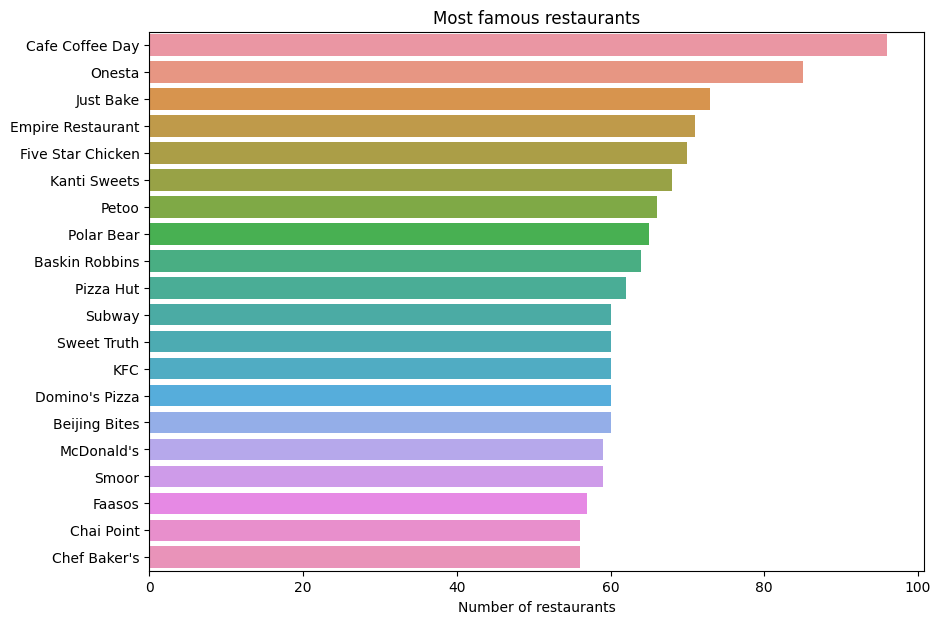

In [18]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index)
plt.title("Most famous restaurants")
plt.xlabel("Number of restaurants");

In [19]:
# Number of repeated restaurants observations in different category features 
dub_res = df.duplicated(subset='name').sum()
# Number of resturants
uni_res = df.name.unique().size
# total number of obsercations
total_obs= df.shape[0]
print("Total number of observations =", total_obs)
print("Total number of unique resturant names =", uni_res)
print("Total number of dublicated resturants names =", dub_res)
# validate observations
print("Are the total sum of both unique resturant names and dublicated names equal to total sum of observations ?",
      dub_res + uni_res == total_obs)

Total number of observations = 51148
Total number of unique resturant names = 8723
Total number of dublicated resturants names = 42425
Are the total sum of both unique resturant names and dublicated names equal to total sum of observations ? True


#### What is the avilability percentage for ordaring online?

In [20]:
df.online_order.value_counts()

Yes    30311
No     20837
Name: online_order, dtype: int64

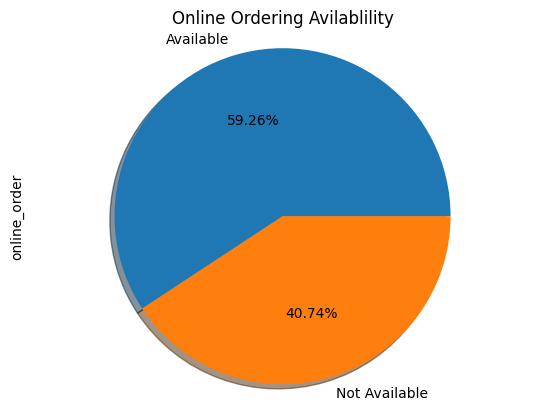

In [21]:
# Exploring features: online_order
df.online_order.value_counts().plot(kind='pie',labels= ['Available', 'Not Available'],  shadow=True, autopct='%1.2f%%')
plt.title('Online Ordering Avilablility')
plt.axis('equal')
plt.show();

In [22]:
df.book_table.value_counts()

No     44699
Yes     6449
Name: book_table, dtype: int64

#### What is the avilability percentage for booking a table?

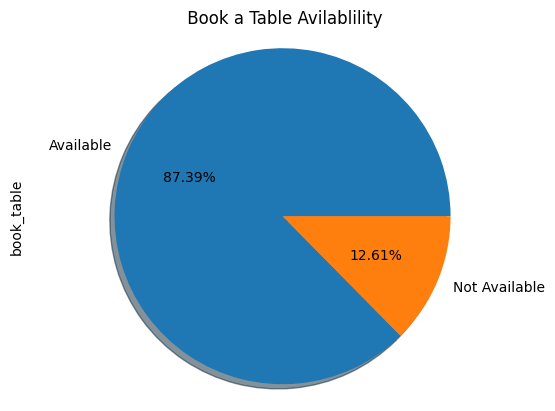

In [23]:
# Exploring features: book_table
df.book_table.value_counts().plot(kind='pie',labels= ['Available', 'Not Available'], shadow=True, autopct='%1.2f%%')
plt.title(' Book a Table Avilablility')
plt.axis('equal')
plt.show();

In [24]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [25]:
df.rate.value_counts(dropna=False)

NaN       7615
NEW       2205
3.9/5     2091
3.7/5     2008
3.8/5     1999
3.9 /5    1867
3.8 /5    1820
3.7 /5    1800
3.6/5     1754
4.0/5     1598
4.0 /5    1547
3.6 /5    1533
4.1/5     1471
4.1 /5    1457
3.5/5     1424
3.5 /5    1340
3.4/5     1250
3.4 /5    1197
3.3/5     1152
4.2 /5    1142
3.3 /5    1125
4.2/5     1013
3.2/5      997
4.3 /5     911
3.1/5      851
3.2 /5     848
4.3/5      772
3.1 /5     699
4.4 /5     627
3.0/5      544
4.4/5      519
3.0 /5     447
2.9/5      427
4.5 /5     409
2.9 /5     374
2.8/5      302
2.8 /5     278
4.5/5      247
4.6 /5     175
2.7/5      167
2.6/5      140
2.7 /5     136
4.6/5      125
2.6 /5     109
4.7 /5      86
4.7/5       81
-           65
2.5 /5      56
2.5/5       44
4.8 /5      43
2.4/5       36
4.9 /5      30
2.4 /5      30
2.3/5       28
4.9/5       25
2.3 /5      23
4.8/5       23
2.2/5       19
2.1 /5      13
2.1/5       11
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, dtype: int64

In [26]:
df['rate'] = df.rate.str.replace(' ', '').str.replace('/5', '').replace("NEW",np.NaN).replace("-", np.NaN).astype('float')

In [27]:
print("Percentage of Missing rate of all dataset:",
      (df.rate.isna().sum() * 100 / df.index.size).round(2))

print("the percentage is large to replace my median as it will bias our model, therefore it will be dropped")
df.dropna(subset = ['rate'], inplace=True)

Percentage of Missing rate of all dataset: 19.33
the percentage is large to replace my median as it will bias our model, therefore it will be dropped


#### What are the average rate of all restaurants?

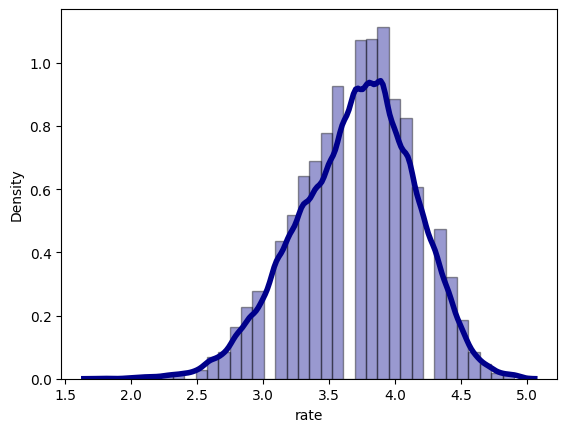

In [28]:
# Plot rating distribution
rating=df['rate'].astype('float')
sns.distplot(rating, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

#### what is the top rate of most of restaurants?

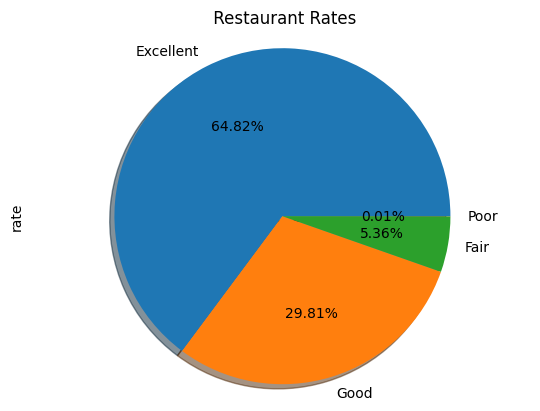

In [29]:
# Exploring features: rate
df.rate.astype('int').value_counts().plot(kind='pie',
                                          labels= ['Excellent', 'Good', 'Fair', 'Poor', 'Bad'],
                                          shadow=True, autopct='%1.2f%%')
plt.title(' Restaurant Rates')
plt.axis('equal')
plt.show();

#### What are the most popular locations for restaurants?

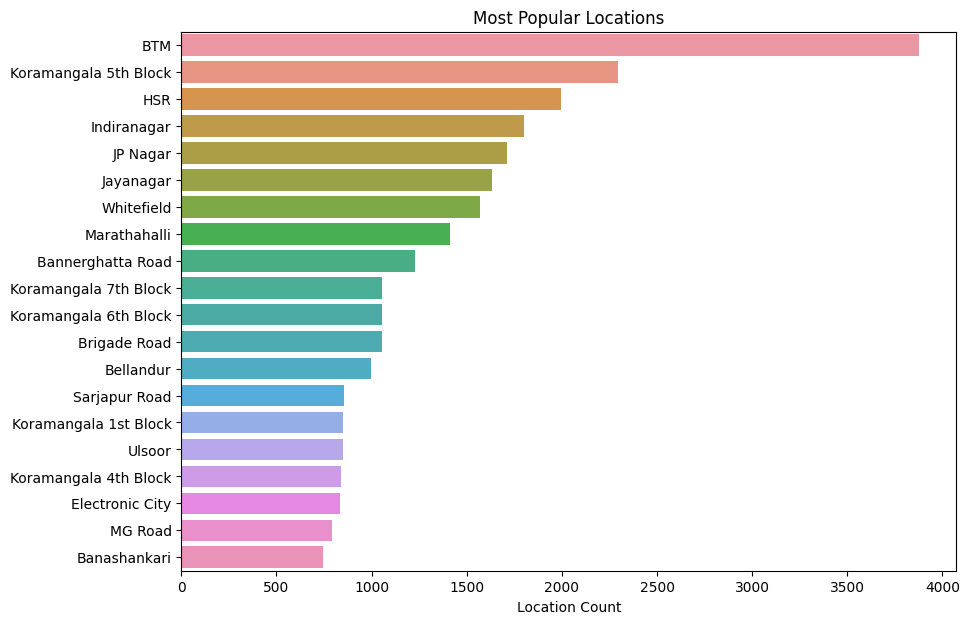

In [30]:
plt.figure(figsize=(10,7))
loc=df['location'].value_counts()[:20]
sns.barplot(x=loc,y=loc.index)
plt.title("Most Popular Locations")
plt.xlabel("Location Count");

#### What are the most popular restaurants type?

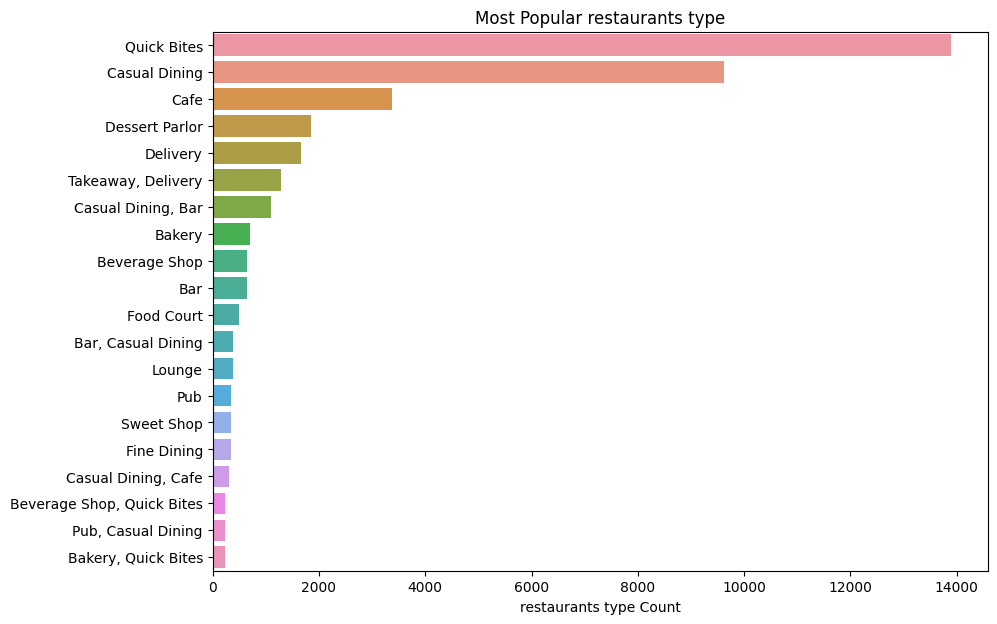

In [31]:
plt.figure(figsize=(10,7))
rest_type=df['rest_type'].value_counts()[:20]
sns.barplot(x=rest_type,y=rest_type.index)
plt.title("Most Popular restaurants type")
plt.xlabel("restaurants type Count");

#### What are the top 10 liked dishes?

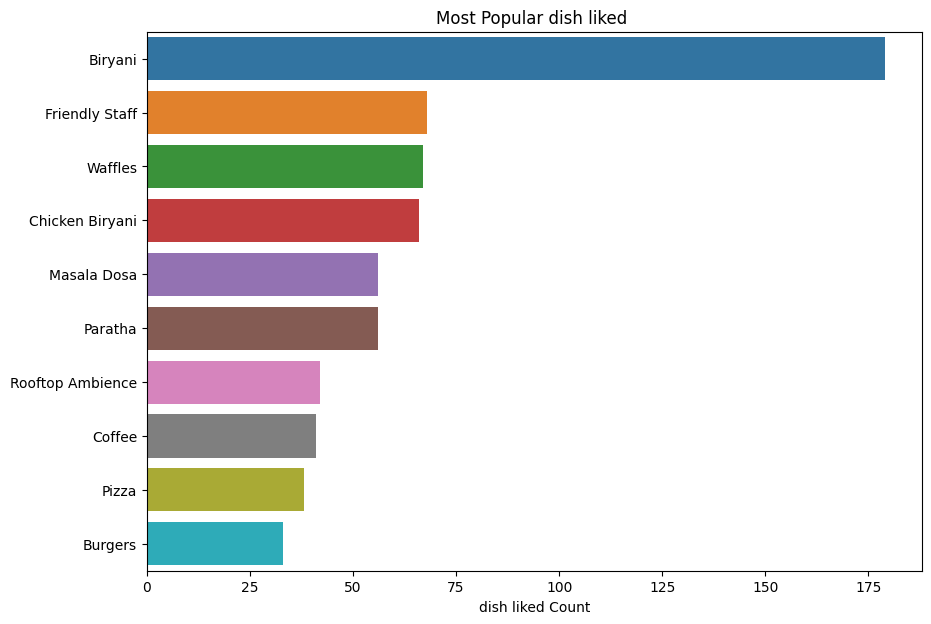

In [32]:
plt.figure(figsize=(10,7))
dish_liked=df['dish_liked'].value_counts()[:10]
sns.barplot(x=dish_liked,y=dish_liked.index)
plt.title("Most Popular dish liked ")
plt.xlabel("dish liked Count");

#### What are the most liked cuisines?

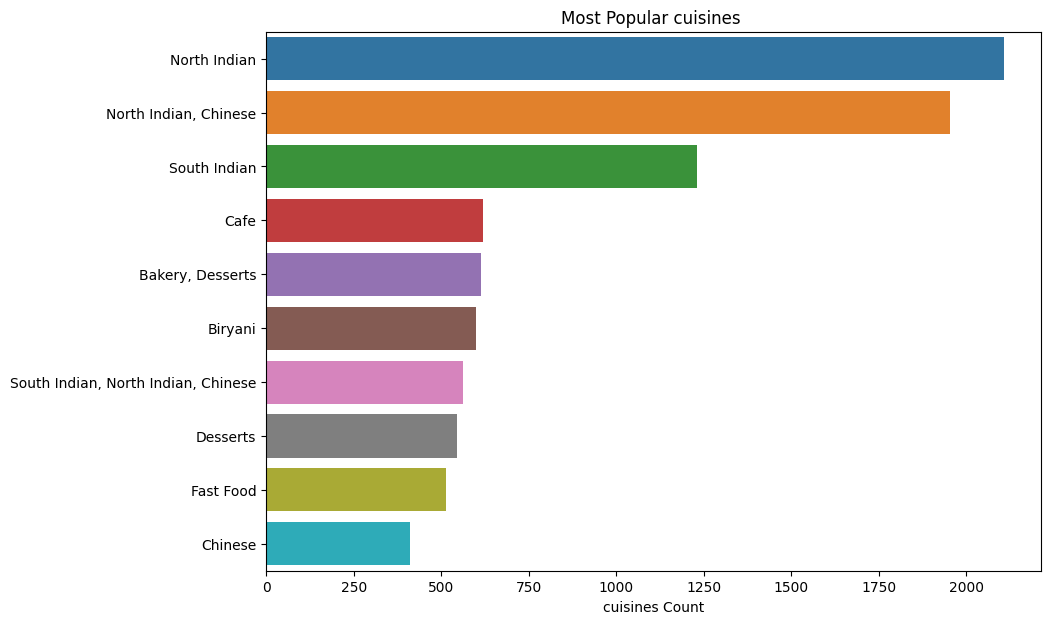

In [33]:
plt.figure(figsize=(10,7))
cuisines=df['cuisines'].value_counts()[:10]
sns.barplot(x=cuisines,y=cuisines.index)
plt.title("Most Popular cuisines ")
plt.xlabel("cuisines Count");

In [34]:
df.average_cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800',
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

In [35]:
df.dropna(subset = ['average_cost'], inplace=True)
df.average_cost = df.average_cost.str.replace(',','')
df.average_cost = df.average_cost.astype(int)

#### What is the average cost of causines?

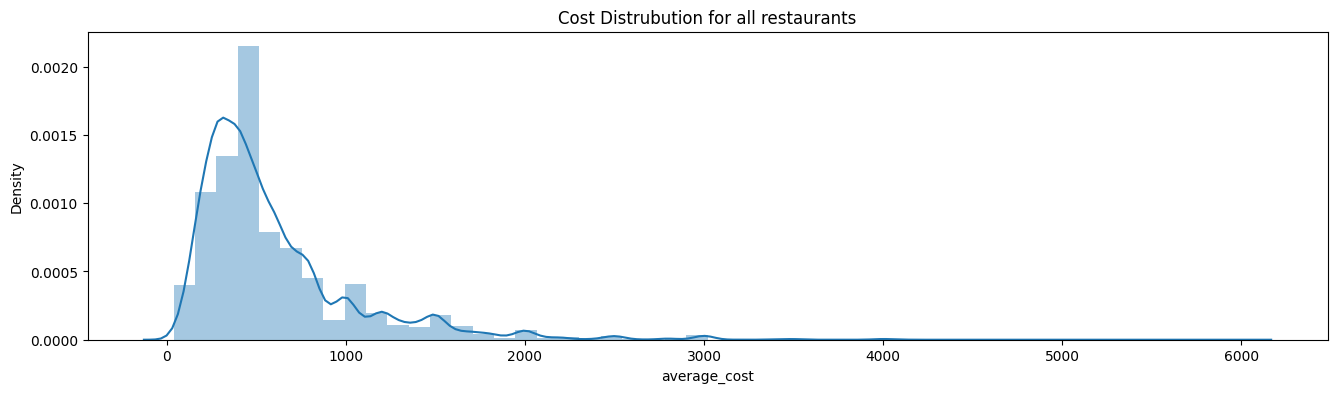

In [36]:
fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(df['average_cost'],ax=ax)
ax.set_title('Cost Distrubution for all restaurants');

Reviews Extraction:

In [37]:
all_ratings = []

for name,ratings in tqdm(zip(df['name'],df['reviews_list'])):
    ratings = eval(ratings)
    for score, doc in ratings:
        if score:
            score = score.strip("Rated").strip()
            doc = doc.strip('RATED').strip()
            score = float(score)
            all_ratings.append([name,score, doc])

41263it [00:27, 1522.90it/s]


In [38]:
rating_df=pd.DataFrame(all_ratings,columns=['name','rating','review'])
rating_df['review']=rating_df['review'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]',"",x))

In [39]:
rating_df.to_csv("Ratings.csv")

#### What is the most repeated words in reviews?

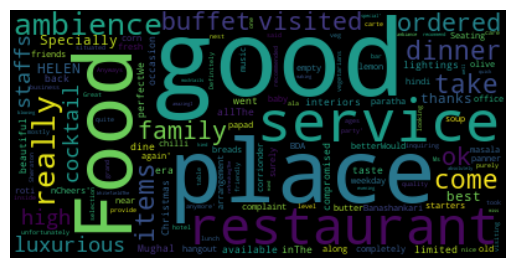

In [40]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str(rating_df.review.values))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

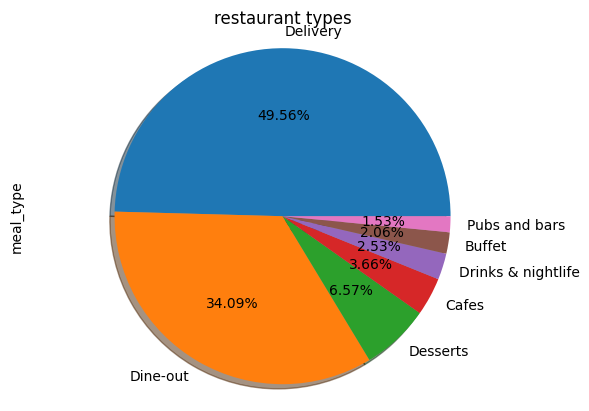

In [41]:
# Exploring features: meal_type
df.meal_type.value_counts().plot(kind='pie', shadow=True, autopct='%1.2f%%')
plt.title('restaurant types')
plt.axis('equal')
plt.show();

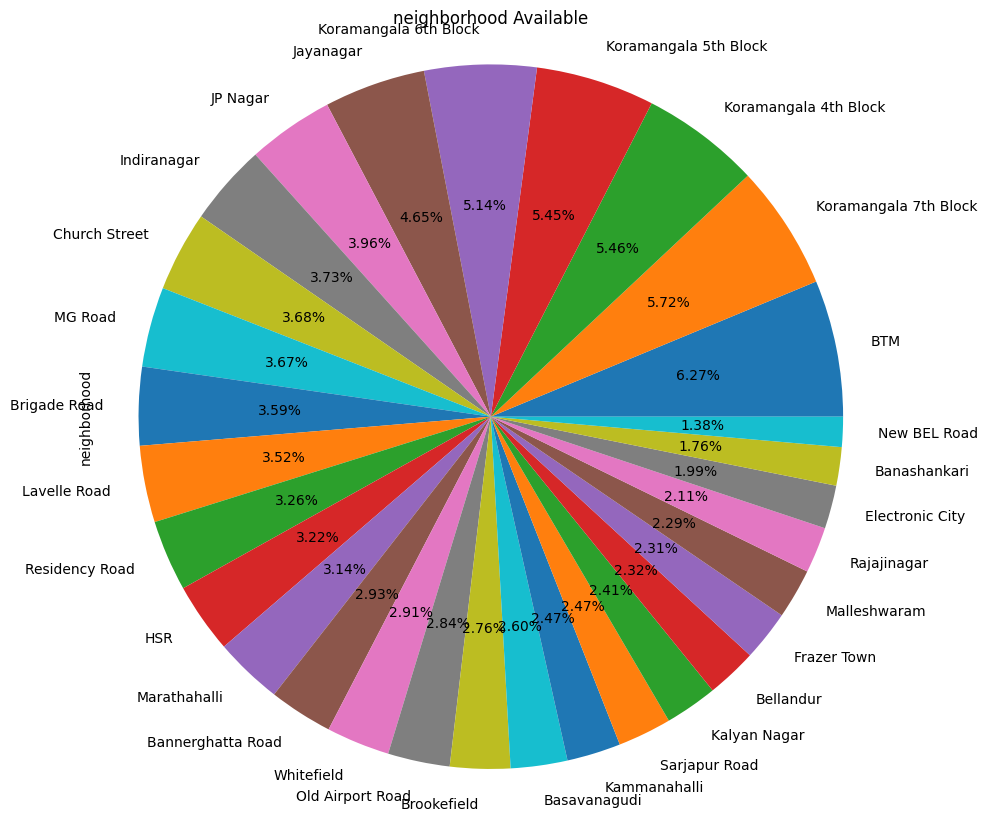

In [42]:
# Exploring features: neighborhood
plt.figure(figsize=(10,10))
df.neighborhood.value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('neighborhood Available')
plt.axis('equal')
plt.show();

### Bivariate Analysis

#### What are top 3 restaurants famous for ?

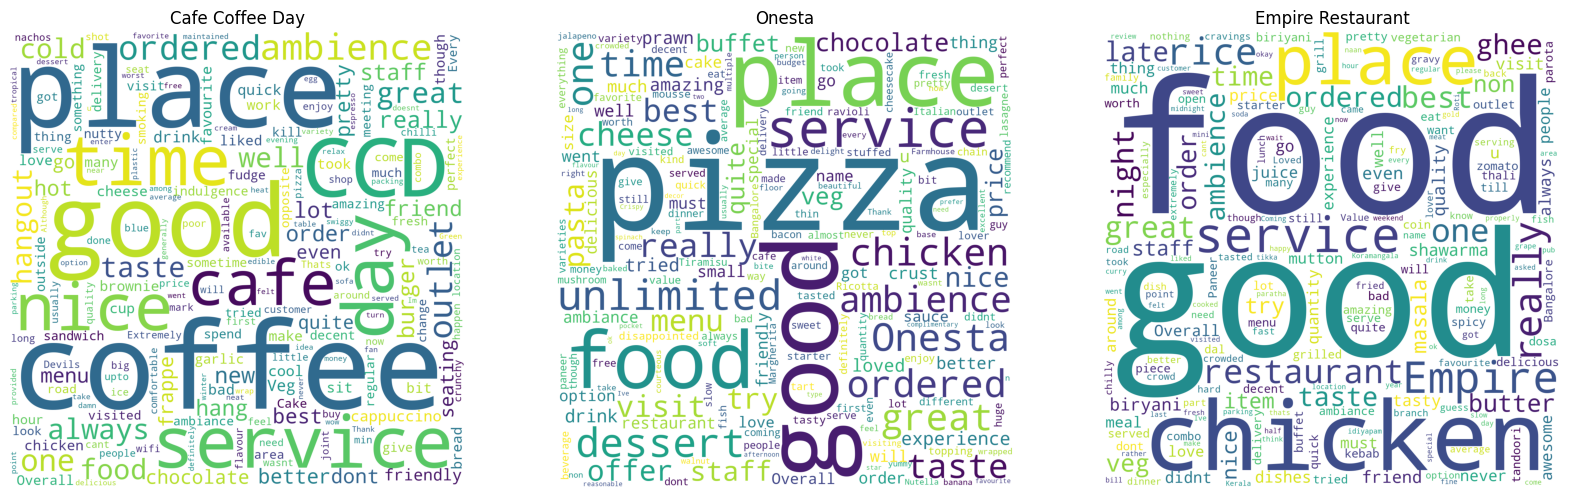

In [43]:
rest=df['name'].value_counts()[:3].index
def produce_wordcloud(rest):
    
    plt.figure(figsize=(20,30))
    for i,r in enumerate(rest):
        plt.subplot(1,3,i+1)
        corpus=rating_df[rating_df['name']==r]['review'].values.tolist()
        corpus=' '.join(x  for x in corpus)
        wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1500, height=1500).generate(corpus)
        plt.imshow(wordcloud)
        plt.title(r)
        plt.axis("off")
        

        
        
produce_wordcloud(rest)

In [44]:
os.remove("/kaggle/working/Ratings.csv")

### More Preprocessing

In [45]:
# check for nulls
df.isnull().sum()

url                 0
address             0
name                0
online_order        0
book_table          0
rate                0
votes               0
phone             576
location            0
rest_type           0
dish_liked      18004
cuisines            0
average_cost        0
reviews_list        0
meal_type           0
neighborhood        0
dtype: int64

**dish_liked** has more than 50% missing values that could affect our data badly

In [46]:
# drop irrelevant features:
to_remove = ['url','address','name','phone','reviews_list','dish_liked']
df.drop(to_remove, axis = 1, inplace = True)

In [47]:
# check for nulls
df.isnull().sum()

online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
average_cost    0
meal_type       0
neighborhood    0
dtype: int64

In [48]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost,meal_type,neighborhood
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


### Feature Engineering

#### Feature Extraction

In [49]:
df['rest_type_count'] = df.rest_type.str.count(',') + 1
df['rest_type_count'].fillna(1,inplace = True)
df['cuisines_total'] = df.cuisines.str.count(',') + 1
df['cuisines_total'].fillna(1,inplace = True)

**location** feature is very similar to **neighborhood**, so we will drop it.

In [50]:
df.drop(['rest_type','cuisines','location'], axis = 1, inplace = True)

In [51]:
df.head()

,online_order,book_table,rate,votes,average_cost,meal_type,neighborhood,rest_type_count,cuisines_total
0,Yes,Yes,4.1,775,800,Buffet,Banashankari,1,3
1,Yes,No,4.1,787,800,Buffet,Banashankari,1,3
2,Yes,No,3.8,918,800,Buffet,Banashankari,2,3
3,No,No,3.7,88,300,Buffet,Banashankari,1,2
4,No,No,3.8,166,600,Buffet,Banashankari,1,2


In [52]:
df['target'] = 0
df.loc[df['rate'] >= 3.7, 'target'] = 1

In [53]:
df.drop('rate', axis = 1, inplace = True)

In [54]:
df.head()

,online_order,book_table,votes,average_cost,meal_type,neighborhood,rest_type_count,cuisines_total,target
0,Yes,Yes,775,800,Buffet,Banashankari,1,3,1
1,Yes,No,787,800,Buffet,Banashankari,1,3,1
2,Yes,No,918,800,Buffet,Banashankari,2,3,1
3,No,No,88,300,Buffet,Banashankari,1,2,1
4,No,No,166,600,Buffet,Banashankari,1,2,1


In [55]:
df.meal_type.nunique()

7

In [56]:
newdf = df.copy().reset_index(drop=True)

In [57]:
newdf.target.value_counts()

1    23886
0    17377
Name: target, dtype: int64

In [58]:
newdf.shape

(41263, 9)

In [59]:
newdf.to_csv('cleaned.csv', index=False,header=True)

## Modeling

In [60]:
# Splitting the data
X = newdf.drop('target', axis=1)
y = newdf['target']

In [61]:
import category_encoders as ce
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.pipeline import Pipeline
from sklearn import set_config

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#### Transformations

In [62]:
# Encoding 
encoder = ColumnTransformer(
    transformers=[
        ("OHE", OneHotEncoder(sparse=False, drop="first"), ['online_order','book_table']),
        ("BIE", ce.BinaryEncoder(),["neighborhood","meal_type"])
    ],remainder="passthrough")

In [63]:
# Scalling 
scaler = RobustScaler()

#### Logistic Regression

In [64]:
# classifier
clf = LogisticRegression()

# make steps
steps = [("Encoder",encoder),("Scaler",scaler),("clf", clf)]

# Building a complete Pipeline
pipeline = Pipeline(steps=steps)

In [65]:
set_config(display='diagram')
display(pipeline)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['online_order',
                                                   'book_table']),
                                                 ('BIE', BinaryEncoder(),
                                                  ['neighborhood',
                                                   'meal_type'])])),
                ('Scaler', RobustScaler()), ('clf', LogisticRegression())])

In [66]:
# Logistic Regression hyperparameters
logreg_param_grid = {
    'clf__C': [100, 10, 1.0, 0.1, 0.01],
    'clf__penalty': ['l1', 'l2'],
    'clf__class_weight': ['balanced', None],
    'clf__random_state': [0],
    'clf__solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Grid search 
grid_lr = GridSearchCV(pipeline, logreg_param_grid, cv=5, scoring='accuracy')

In [67]:
grid_lr.fit(X, y);

In [68]:
grid_lr.best_score_

0.7522486307509971

In [69]:
grid_lr.best_params_

{'clf__C': 0.01,
 'clf__class_weight': None,
 'clf__penalty': 'l1',
 'clf__random_state': 0,
 'clf__solver': 'liblinear'}

#### Decision Trees

In [70]:
# classifier
clf = DecisionTreeClassifier()

# make steps
steps = [("Encoder",encoder),("Scaler",scaler),("clf", clf)]

# Building a complete Pipeline
pipeline = Pipeline(steps=steps)

In [71]:
set_config(display='diagram')
display(pipeline)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['online_order',
                                                   'book_table']),
                                                 ('BIE', BinaryEncoder(),
                                                  ['neighborhood',
                                                   'meal_type'])])),
                ('Scaler', RobustScaler()), ('clf', DecisionTreeClassifier())])

In [72]:
# Decision Trees hyperparameters
tree_param_grid = {
    'clf__criterion': ['entropy', 'gini'],
    'clf__max_depth': [3, 5, 10, 20, 40, 70, 90],
    'clf__max_features': np.arange(1, X.shape[1]),
    'clf__class_weight': ['balanced', None],
    'clf__random_state': [0]
}

# Grid search 
grid_dt = GridSearchCV(pipeline, tree_param_grid, cv=5, scoring='accuracy')

In [73]:
grid_dt.fit(X, y);

In [74]:
grid_dt.best_score_

0.802075515482582

In [75]:
grid_dt.best_params_

{'clf__class_weight': None,
 'clf__criterion': 'entropy',
 'clf__max_depth': 40,
 'clf__max_features': 7,
 'clf__random_state': 0}

#### Random Forest

In [76]:
# classifier
clf = RandomForestClassifier()

# make steps
steps = [("Encoder",encoder),("Scaler",scaler),("clf", clf)]

# Building a complete Pipeline
pipeline = Pipeline(steps=steps)

In [77]:
set_config(display='diagram')
display(pipeline)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['online_order',
                                                   'book_table']),
                                                 ('BIE', BinaryEncoder(),
                                                  ['neighborhood',
                                                   'meal_type'])])),
                ('Scaler', RobustScaler()), ('clf', RandomForestClassifier())])

In [78]:
# Random Forest hyperparameters
forest_param_grid = {
    'clf__bootstrap': [True],
    'clf__max_depth': [5, 20, 50],
    'clf__n_estimators': [50, 100, 200],
    'clf__random_state': [0],
    'clf__max_features': ['auto', 'sqrt'],
    'clf__class_weight': ['balanced', None]
}

# Grid search 
grid_rf = GridSearchCV(pipeline, forest_param_grid, cv=5, scoring='accuracy')

In [79]:
grid_rf.fit(X, y);

In [80]:
grid_rf.best_score_

0.812156862537802

In [81]:
grid_rf.best_params_

{'clf__bootstrap': True,
 'clf__class_weight': 'balanced',
 'clf__max_depth': 50,
 'clf__max_features': 'auto',
 'clf__n_estimators': 200,
 'clf__random_state': 0}

#### KNN

In [82]:
# classifier
clf = KNeighborsRegressor()

# make steps
steps = [("Encoder",encoder),("Scaler",scaler),("clf", clf)]

# Building a complete Pipeline
pipeline = Pipeline(steps=steps)

In [83]:
set_config(display='diagram')
display(pipeline)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['online_order',
                                                   'book_table']),
                                                 ('BIE', BinaryEncoder(),
                                                  ['neighborhood',
                                                   'meal_type'])])),
                ('Scaler', RobustScaler()), ('clf', KNeighborsRegressor())])

In [84]:
# knn hyperparameters
knn_grid = {
    'clf__n_neighbors': list(range(1,10)),
    'clf__p': [1,2]
}

# Grid search 
grid_knn = GridSearchCV(pipeline, knn_grid, cv=5, scoring='accuracy')


In [85]:
grid_knn.fit(X,y);

In [86]:
grid_knn.best_score_

0.796887875024103

In [87]:
grid_knn.best_params_

{'clf__n_neighbors': 1, 'clf__p': 1}

#### Production Model

In [88]:
#finaldf = df.copy().reset_index(drop=True)
finaldf = pd.read_csv("/kaggle/working/cleaned.csv", encoding='utf-8')

In [89]:
finaldf.target.value_counts()

1    23886
0    17377
Name: target, dtype: int64

In [90]:
# Splitting the data
Xf = finaldf.drop('target', axis=1)
yf = finaldf['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(Xf, yf, test_size=.20, random_state=42)

# Encoding 
encoder = ColumnTransformer(
    transformers=[
        ("OHE", OneHotEncoder(sparse=False, drop="first"), ['online_order','book_table']),
        ("BIE", ce.BinaryEncoder(),["neighborhood","meal_type"])
    ],remainder="passthrough")

# Scalling 
scaler = RobustScaler()

# classifier
clf = RandomForestClassifier(bootstrap= True, class_weight= None, max_depth= 50, max_features = 'auto', min_samples_split=10, n_estimators= 100, random_state= 0)

# make steps
steps = [("Encoder",encoder),("Scaler",scaler),("clf", clf)]

# Building a complete Pipeline
final_model = Pipeline(steps=steps)

In [91]:
Xf.head()

,online_order,book_table,votes,average_cost,meal_type,neighborhood,rest_type_count,cuisines_total
0,Yes,Yes,775,800,Buffet,Banashankari,1,3
1,Yes,No,787,800,Buffet,Banashankari,1,3
2,Yes,No,918,800,Buffet,Banashankari,2,3
3,No,No,88,300,Buffet,Banashankari,1,2
4,No,No,166,600,Buffet,Banashankari,1,2


In [92]:
X.cuisines_total.unique()

array([3, 2, 1, 4, 5, 8, 7, 6])

In [93]:
final_model.fit(Xf,yf)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['online_order',
                                                   'book_table']),
                                                 ('BIE', BinaryEncoder(),
                                                  ['neighborhood',
                                                   'meal_type'])])),
                ('Scaler', RobustScaler()),
                ('clf',
                 RandomForestClassifier(max_depth=50, max_features='auto',
                                        min_samples_split=10,
                                        random_state=0))])

In [94]:
y_pred= final_model.predict(X_test)


In [95]:
final_model.score(X_train,y_train)

0.9115722508330809

In [96]:
final_model.score(X_test,y_test)

0.9149400218102508

In [97]:
scores = cross_validate(final_model, Xf, yf, cv=10, scoring="accuracy", return_train_score=True)

In [98]:
scores['train_score'].mean()

0.9104659230171845

In [99]:
scores['test_score'].mean()

0.7841904646240939

In [100]:
# classification report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90      3471
           1       0.91      0.95      0.93      4782

    accuracy                           0.91      8253
   macro avg       0.92      0.91      0.91      8253
weighted avg       0.92      0.91      0.91      8253



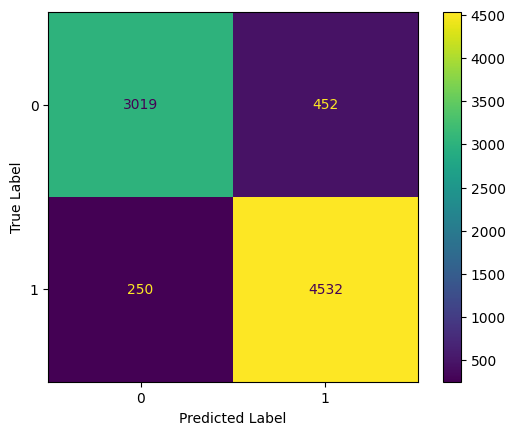

In [101]:
# Plot confusion matrix see true vs predicted target labels
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.tick_params(colors='black')
plt.tick_params(colors='black')
plt.show();

#### Saving Model

In [102]:
# saving model with joblib
import joblib

In [103]:
# dumbing model as .sav
joblib.dump(final_model, "final_model.sav",compress=True)

['final_model.sav']